# `matplotlib_ai`
In this notebook, we will show some examples of what `matplotlib_ai` can do.

In [1]:
!pip install openai

In [4]:
!pip install matplotlib-ai==1.0.3

  Attempting uninstall: matplotlib-ai
    Found existing installation: matplotlib-ai 1.0.2
    Uninstalling matplotlib-ai-1.0.2:
      Successfully uninstalled matplotlib-ai-1.0.2


Instantiating an `matplotlib_ai` object is as easy as:

In [5]:
from matplotlib_ai.matplotlib_ai import matplotlib_ai
key = "YOUR_API_KEY"
mpl_ai = matplotlib_ai(key)

Now, let's try out some simple examples.

In [25]:
import numpy as np

x = np.arange(-10, 10, step=0.05)
y = np.sin(x)

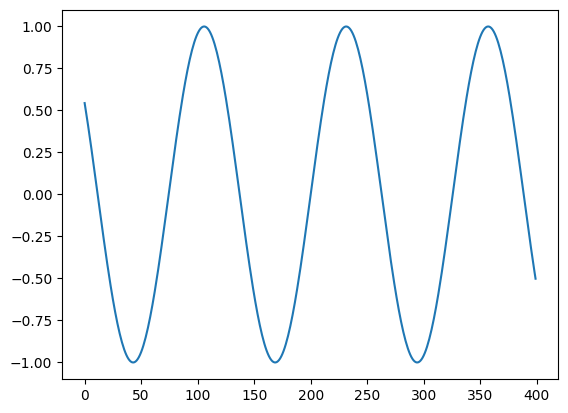

In [26]:
code = mpl_ai("graph y")

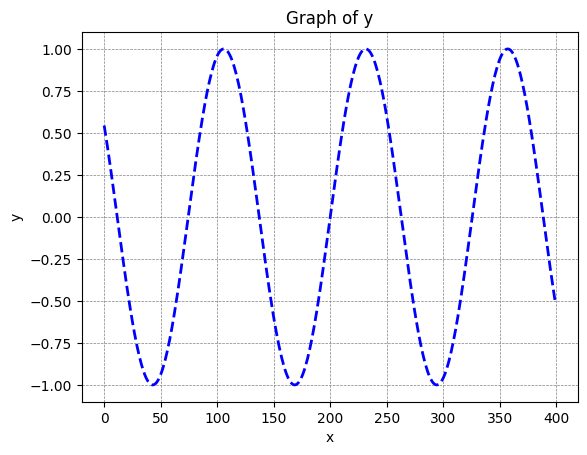

In [28]:
code = mpl_ai("graph y and make the graph look modern")

Let's try to graph something with the dictionary object.

In [29]:
data = {
    'a': y,
    'b': x * 1.3 + 0.5 + np.random.randn(x.shape[0]) * 0.5,
    'c': np.cos(x)
}

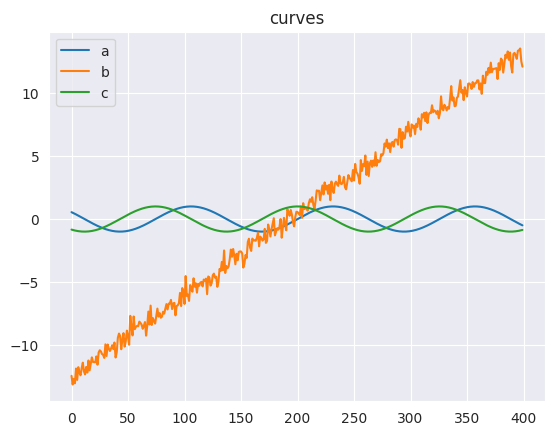

In [30]:
code = mpl_ai("graph all the curves in data and make each curve a different color. \
               Title the graph 'curves'. Use the seaborn style.")

In [32]:
print(code[0])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

for curve in data:
    plt.plot(data[curve], label=curve)

plt.title('curves')
plt.legend()
plt.show()


Let's try a DataFrame object using the data from above with an additional column `d`.

In [36]:
import pandas as pd

data['d'] = np.random.randint(0, 15, size=(400,))
df = pd.DataFrame(data)
df.head()

,a,b,c,d
0,0.544021,-12.449874,-0.839072,1
1,0.501405,-13.135187,-0.865213,5
2,0.457536,-12.688980,-0.889191,0
3,0.412523,-13.041498,-0.910947,6
4,0.366479,-11.871705,-0.930426,11


<string>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


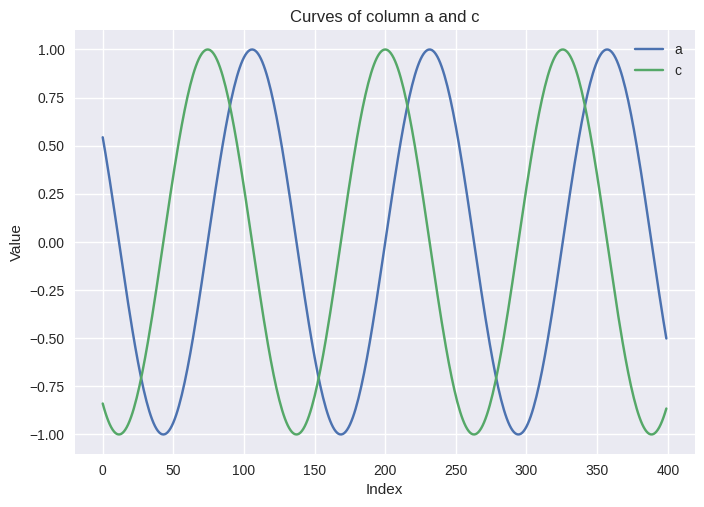

<string>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


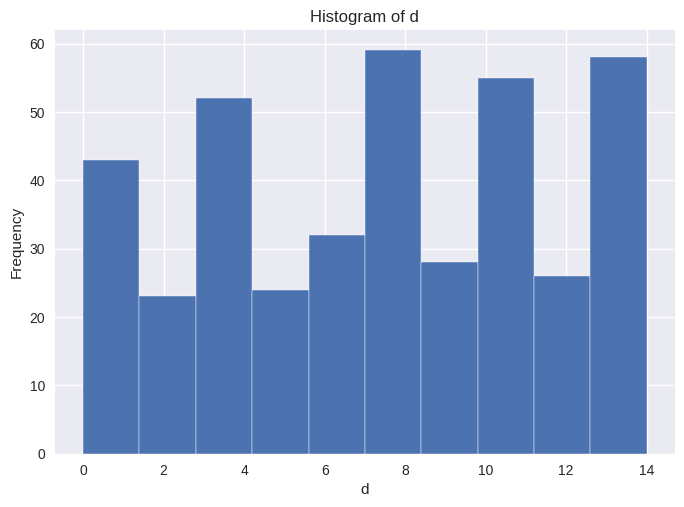

In [37]:
code = mpl_ai("From the DataFrame df, create 2 graphs: one graph plots the curves \
               of column a and c, and the second graph plots the histogram of d. \
               Both graphs should be in seaborn style.")

Let's inspect the AI-generated code.

In [38]:
print(code[0])

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the curves of column a and c
plt.style.use('seaborn')
plt.plot(df['a'], label='a')
plt.plot(df['c'], label='c')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Curves of column a and c')
plt.show()

# Plotting the histogram of column d
plt.style.use('seaborn')
plt.hist(df['d'], bins=10)
plt.xlabel('d')
plt.ylabel('Frequency')
plt.title('Histogram of d')
plt.show()


Now, let's try something a bit more obscure.

In [43]:
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

Let's ask `matplotlib_ai` to create 2 candidate graphs for this prompt.

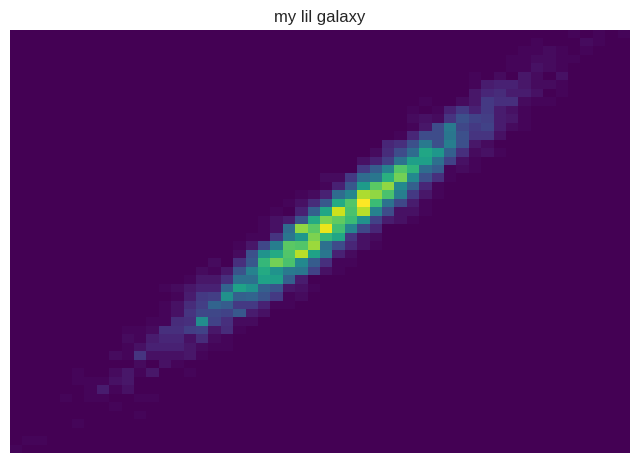

<string>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


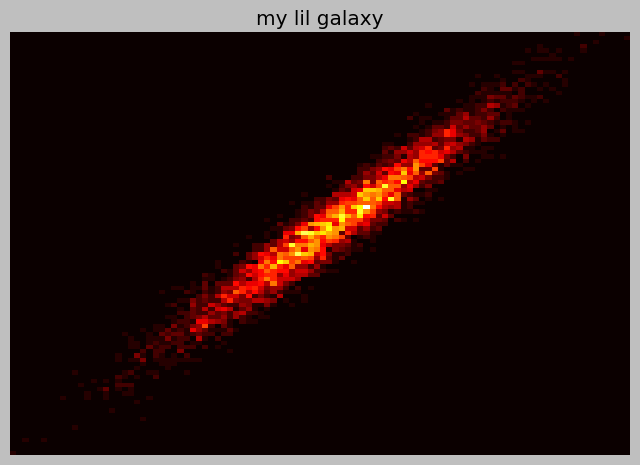

In [44]:
code = mpl_ai("graph the 2D histogram of x and y and make the bins thin. Use the \
               gallery-nogrid style. Remove the axes and title it 'my lil galaxy'. \
               Save the graph.", n_candidates=2)

Although the GPT API key is technically not free, running all these plots cost me less than 1 cent. At last, it appears that with a clear instruction, `matplotlib_ai` can successfully generate the desired graph even if the data needs to be extracted from a dictionary or a DataFrame object.